In [13]:
import xarray as xr 
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('/home/links/ct715/eddy_feedback/')
import functions.eddy_feedback as ef 
import functions.plotting as plot 
import functions.data_wrangling as data 
import functions.aos_functions as aos

In [14]:
ds1 = xr.open_mfdataset('/home/links/ct715/data_storage/reanalysis/srip_datasets/era_int_TEM_ubar_div1.nc',
                        parallel=True, chunks={'time':31})
ds2 = xr.open_mfdataset('/home/links/ct715/data_storage/reanalysis/srip_datasets/jra55_TEM_ubar_div1.nc',
                        parallel=True, chunks={'time':31})
ds3 = xr.open_mfdataset('/home/links/ct715/data_storage/reanalysis/srip_datasets/ncep_ncar_TEM_ubar_div1.nc',
                        parallel=True, chunks={'time':31})

# data missing at 1000hPa, cut out
ds1 = ds1.where(ds1.pressure < 1000, drop=True)
ds2 = ds2.where(ds2.pressure < 1000, drop=True)
ds3 = ds3.where(ds3.pressure < 1000, drop=True)

Seasonal data has been calculated for 1979-2015.

The ERA Interim NH Winter EFP = 0.47


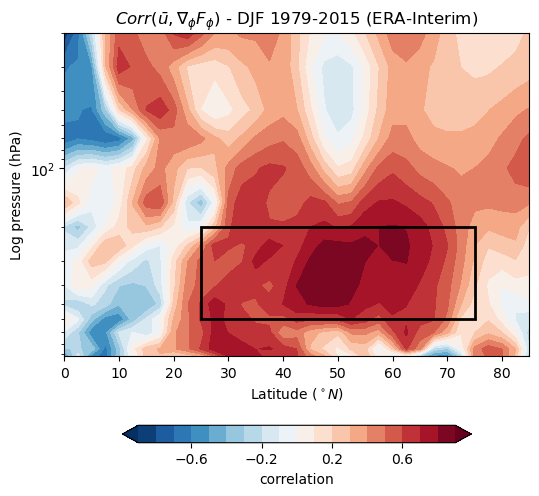

In [15]:
efp_era = ef.calculate_efp(ds1, check_variables=True, flip_level=True)
print(f'The ERA Interim NH Winter EFP = {efp_era.values.round(2)}')

plot.plot_reanalysis_correlation(ds1, check_variables=True, top_atmos=20., cut_poles=True,
                                 label='DJF 1979-2015 (ERA-Interim)')

Seasonal data has been calculated for 1979-2015.

The JRA55 (SRIP) NH Winter EFP = 0.47


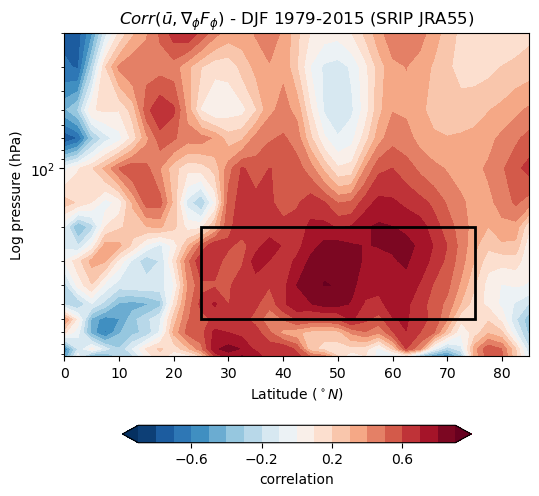

In [16]:
efp_jra = ef.calculate_efp(ds2, check_variables=True, flip_level=True)
print(f'The JRA55 (SRIP) NH Winter EFP = {efp_jra.values.round(2)}')

plot.plot_reanalysis_correlation(ds2, check_variables=True, top_atmos=20., cut_poles=True,
                                 label='DJF 1979-2015 (SRIP JRA55)')

Seasonal data has been calculated for 1979-2015.

The NCEP-NCAR NH Winter EFP = 0.45


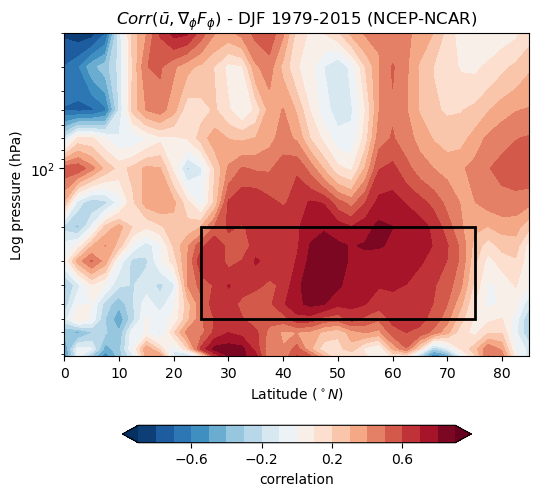

In [17]:
efp_ncep = ef.calculate_efp(ds3, check_variables=True, flip_level=True)
print(f'The NCEP-NCAR NH Winter EFP = {efp_ncep.values.round(2)}')

plot.plot_reanalysis_correlation(ds3, check_variables=True, top_atmos=20., cut_poles=True,
                                 label='DJF 1979-2015 (NCEP-NCAR)')

In [18]:
jra = xr.open_mfdataset('/home/links/ct715/data_storage/reanalysis/jra55_daily/seasonal/jra55_seasonal-djf_uvtw_ubar_ep-pr.nc') 

Seasonal data has been calculated for 1979-2015.

The JRA55 (me) NH Winter EFP = 0.4


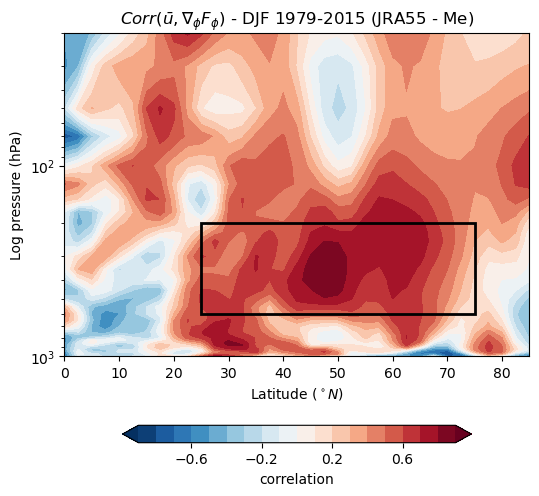

In [19]:
efp_jra55 = ef.calculate_efp(jra, which_div1='div1', take_level_mean=True, flip_latitude=True)
print(f'The JRA55 (me) NH Winter EFP = {efp_jra55.values.round(2)}')

plot.plot_reanalysis_correlation(jra, which_div1='div1', cut_poles=True, top_atmos=20.,
                                 label='DJF 1979-2015 (JRA55 - Me)')

## Southern Hemisphere

Seasonal data has been calculated for 1979-2015.

The ERA Interim SH Winter EFP = 0.32


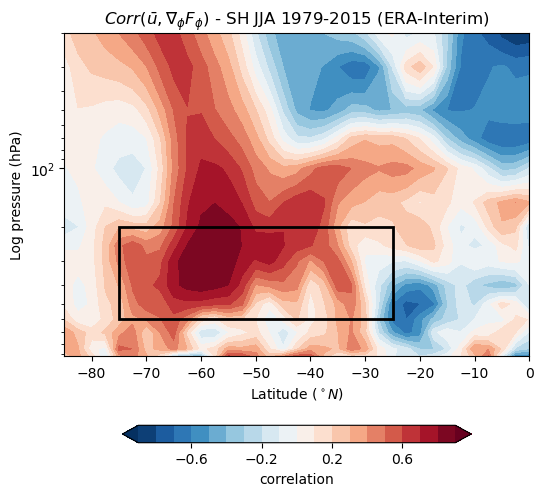

In [20]:
efp_eraSH = ef.calculate_efp(ds1, check_variables=True, flip_level=True, calculate_SH=True)
print(f'The ERA Interim SH Winter EFP = {efp_eraSH.values.round(2)}')

plot.plot_reanalysis_correlation(ds1, check_variables=True, top_atmos=20., cut_poles=True,
                                 label='SH JJA 1979-2015 (ERA-Interim)', latitude='SH')

Seasonal data has been calculated for 1979-2015.

The JRA55 (SRIP) SH Winter EFP = 0.31


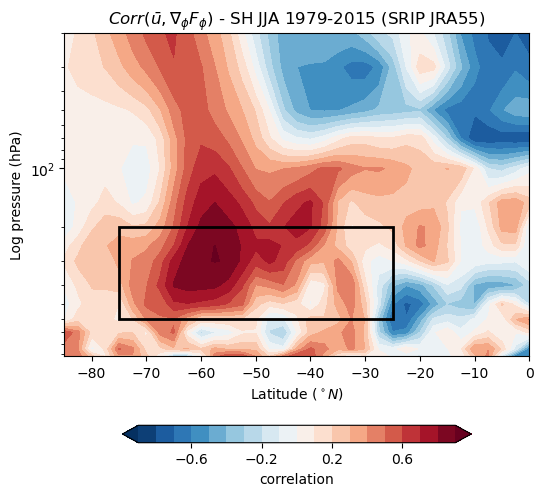

In [21]:
efp_jraSH = ef.calculate_efp(ds2, check_variables=True, flip_level=True, calculate_SH=True)
print(f'The JRA55 (SRIP) SH Winter EFP = {efp_jraSH.values.round(2)}')

plot.plot_reanalysis_correlation(ds2, check_variables=True, top_atmos=20., cut_poles=True,
                                 label='SH JJA 1979-2015 (SRIP JRA55)', latitude='SH')

Seasonal data has been calculated for 1979-2015.

The NCEP-NCAR SH Winter EFP = 0.21


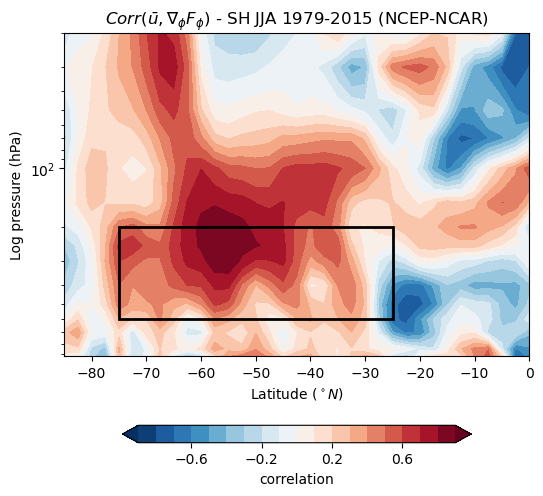

In [22]:
efp_ncepSH = ef.calculate_efp(ds3, check_variables=True, flip_level=True, calculate_SH=True)
print(f'The NCEP-NCAR SH Winter EFP = {efp_ncepSH.values.round(2)}')

plot.plot_reanalysis_correlation(ds3, check_variables=True, top_atmos=20., cut_poles=True,
                                 label='SH JJA 1979-2015 (NCEP-NCAR)', latitude='SH')

Seasonal data has been calculated for 1979-2015.

The JRA55 (me) NH Winter EFP = nan


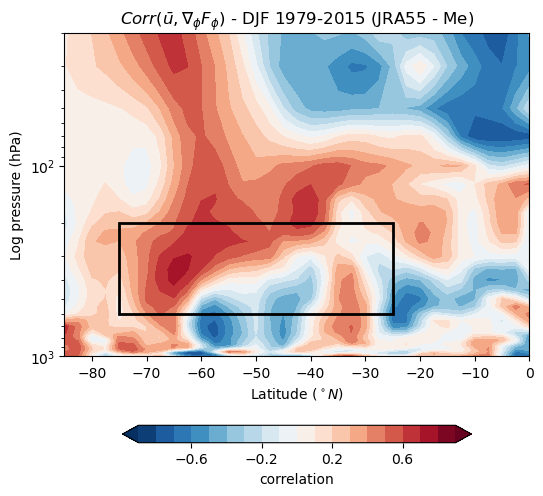

In [23]:
efp_jra55SH = ef.calculate_efp(jra, which_div1='div1', take_level_mean=True, flip_latitude=True,
                               calculate_SH=True)
print(f'The JRA55 (me) NH Winter EFP = {efp_jra55SH.values.round(2)}')

plot.plot_reanalysis_correlation(jra, which_div1='div1', cut_poles=True, top_atmos=20.,
                                 label='DJF 1979-2015 (JRA55 - Me)', latitude='SH')